In [5]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from sentence_transformers import SentenceTransformer, models
from torch import nn
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,f1_score,confusion_matrix

In [6]:
with open('X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

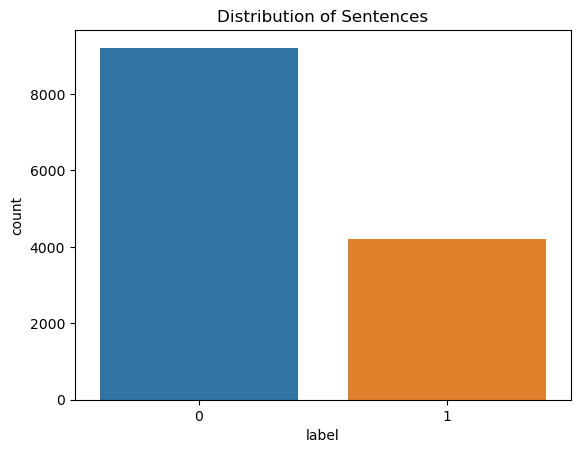

In [8]:
d = {'text' : X_train , 'label' : y_train}
train = pd.DataFrame(data = d)
sns.countplot(x='label',data=train)
plt.title('Distribution of Sentences')
plt.show()

<Axes: xlabel='label', ylabel='length'>

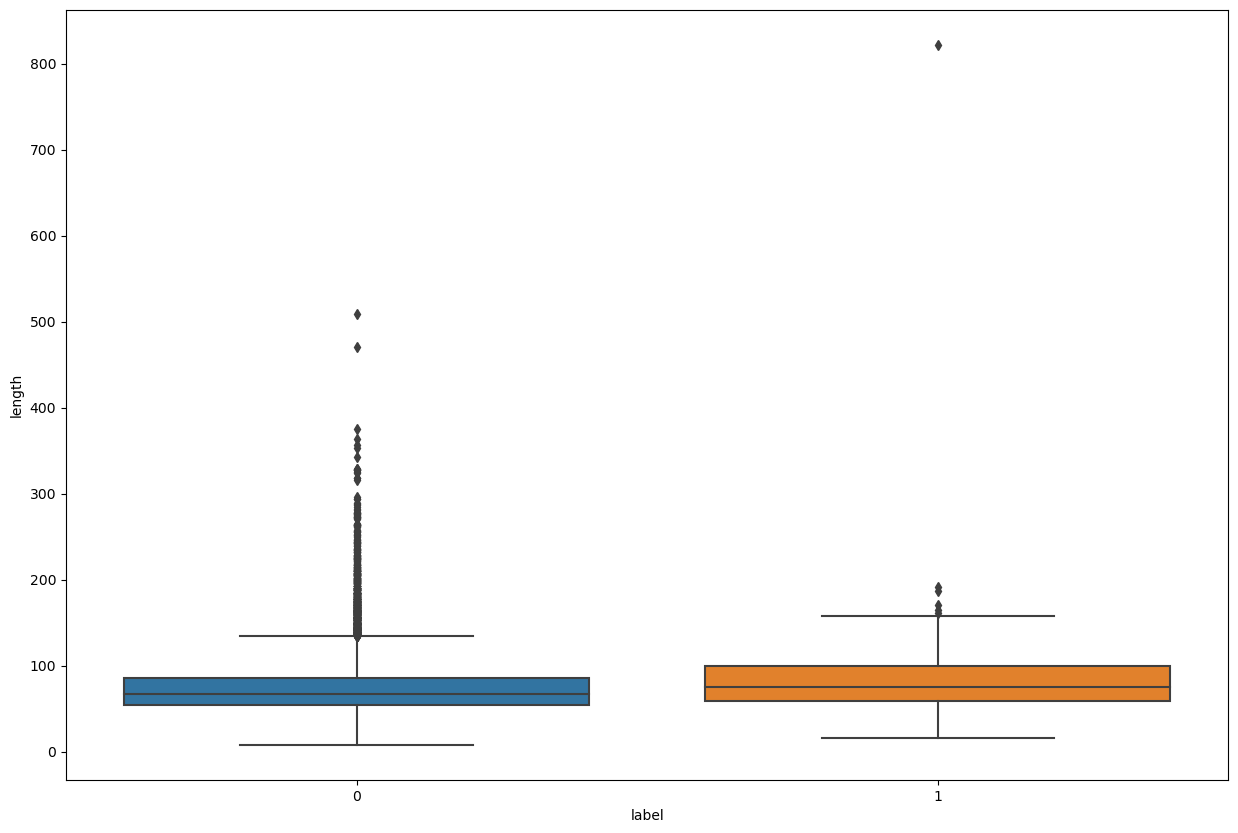

In [9]:
plt.figure(figsize=(15,10))
train['length'] = train.text.apply(lambda x: len(x))
sns.boxplot(x='label',y='length',data=train)

In [15]:
#removing instances with less than 30 and more than 140 chars in training set

print(len(train))
df = train[(train.length >= 30) & (train.length <= 140)]
df = df.reset_index()
print (len(df))

13409
12147


3355
3056


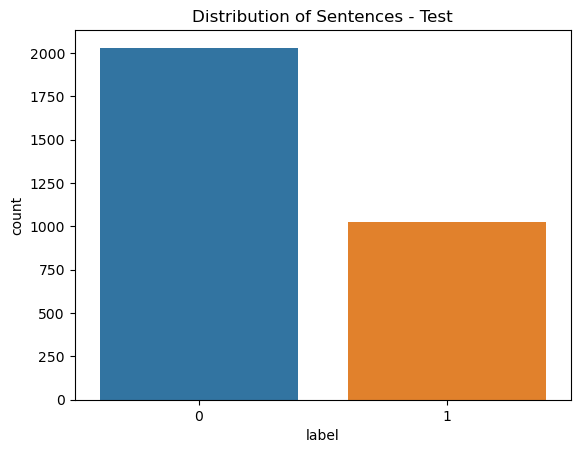

In [23]:
#removing instances with less than 30 and more than 140 chars in test set
testdf = pd.DataFrame()
testdf['text'] = X_test
testdf['label'] = y_test

print(len(testdf))
testdf['length'] = testdf['text'].str.len()
test = testdf[(testdf['length'] >= 30) & (testdf['length'] <= 140)]
test = test.reset_index(drop=True)
print(len(test))


# Looking at Test Sentences Distribution
sns.countplot(x='label',data=test)
plt.title('Distribution of Sentences - Test')
plt.show()

In [20]:
#loads BERT base model from hugging face - sets maximum length to 200 tokens
#pools token embeddings from BERT into a single fixed sized sentence vector
#adds a dense fully connected layer on top of sentence embeddings. uses tanh as activation function
#then combines all these into a sentence transformer

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=200) 
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=200, activation_function=nn.Tanh())

bert_model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
jks = df.text[df.label == 1]
njks = df.text[df.label == 0]

# Deriving the Sentence Embeddings from our model
jokes = bert_model.encode(jks.tolist())
njokes = bert_model.encode(njks.tolist())

# A Huge matrix of Sentence Embeddings
sentences = np.concatenate((jokes,njokes),axis=0)

#Creating the labels
a = np.ones((len(df[df.label == 1]),))
b = np.zeros((len(df[df.label == 0]),))
labels = np.concatenate((a,b),axis=0)

In [24]:
tests = bert_model.encode(testdf.text)